In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_path  = 'train'
test_path = 'test'

In [3]:
len(os.listdir('train'))

12

In [4]:
len(os.listdir('test'))

5

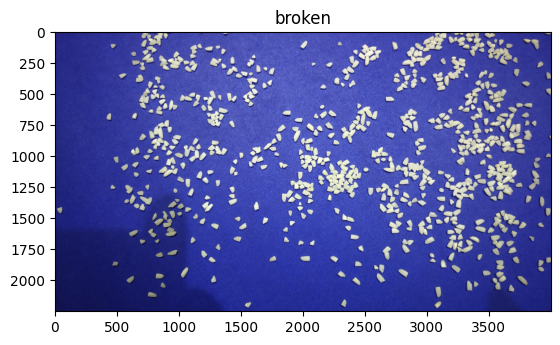

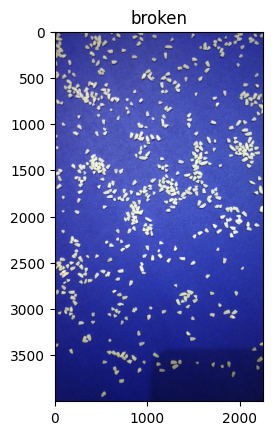

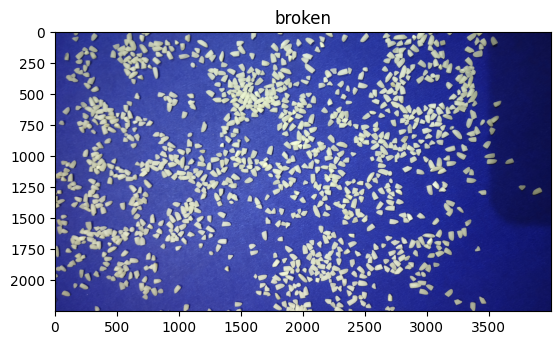

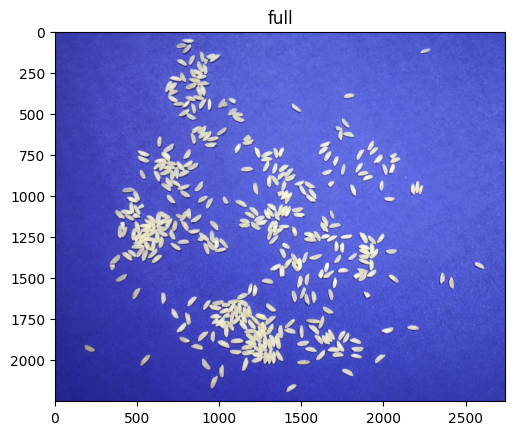

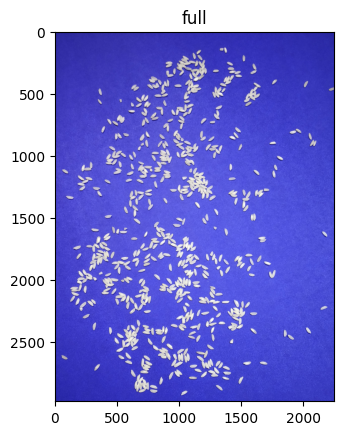

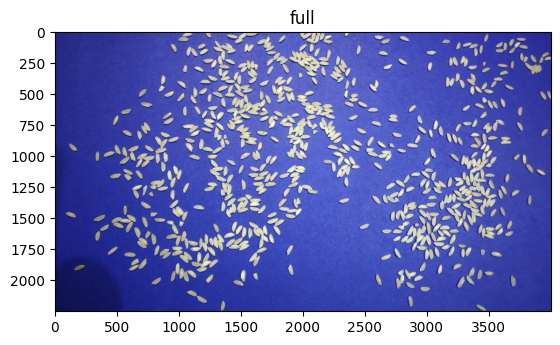

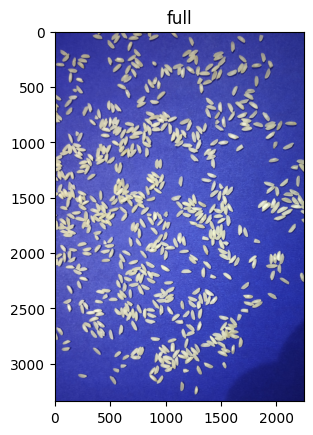

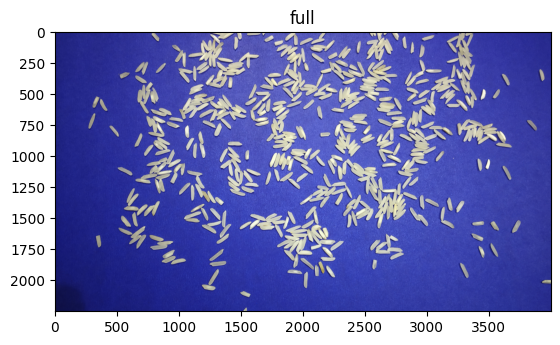

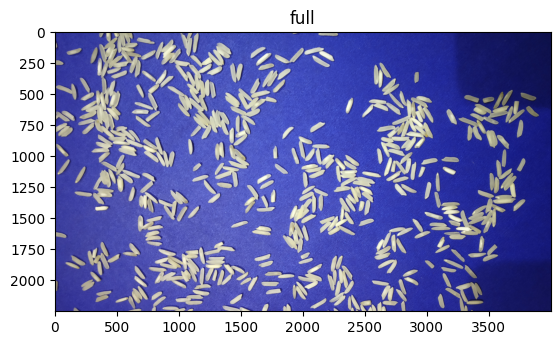

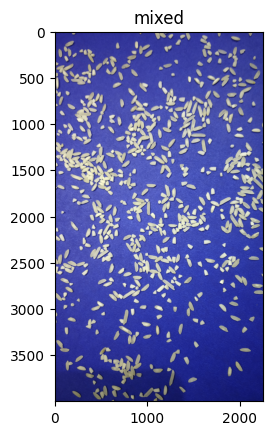

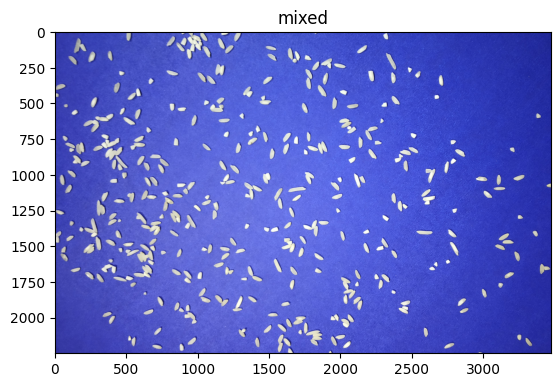

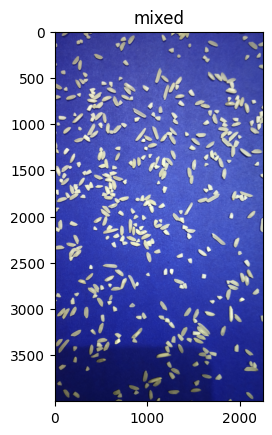

In [5]:
img_list = os.listdir(train_path)
for img_name in img_list:
    img = cv2.imread(os.path.join(train_path, img_name))
    label = img_name.split("_")[0] # extract label from image name
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.show()

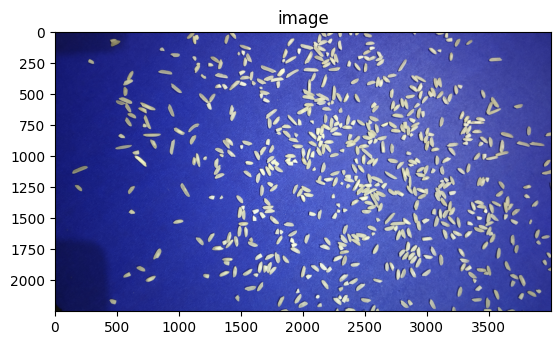

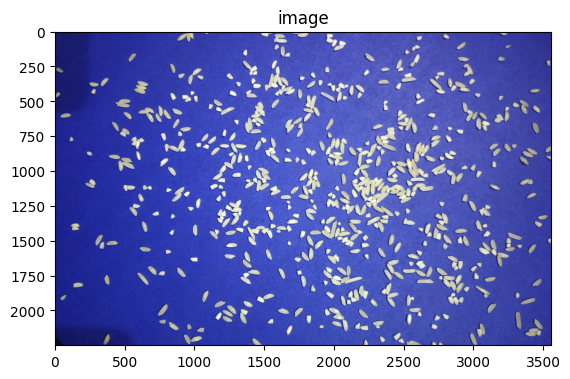

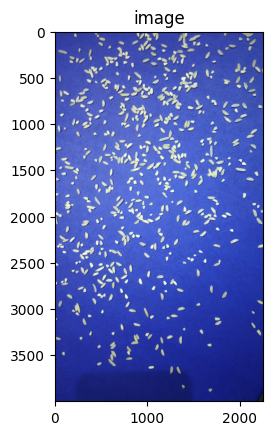

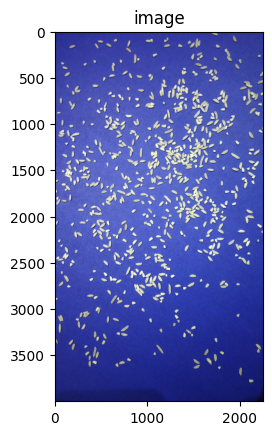

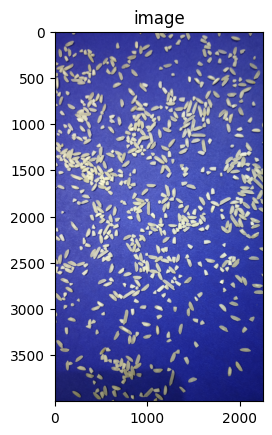

In [6]:
test_img_list = os.listdir(test_path)
for img_name in test_img_list:
    img = cv2.imread(os.path.join(test_path, img_name))
    label = img_name.split("_")[0] # extract label from image name
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.show()


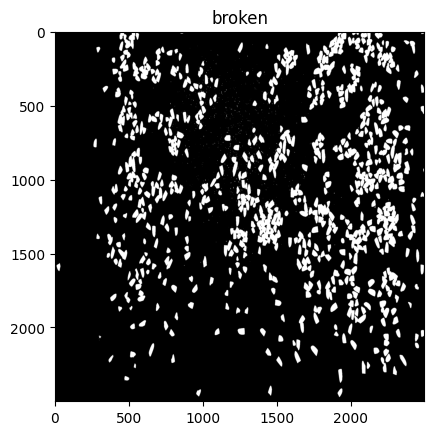

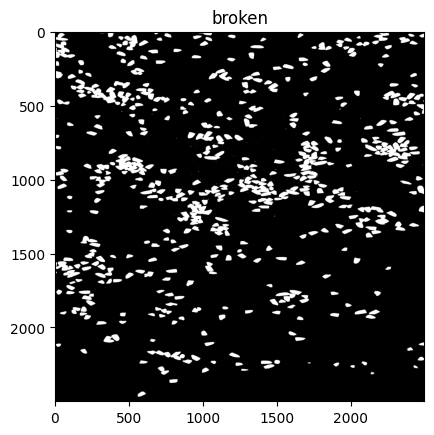

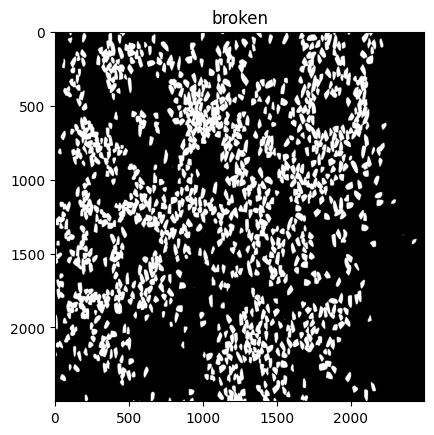

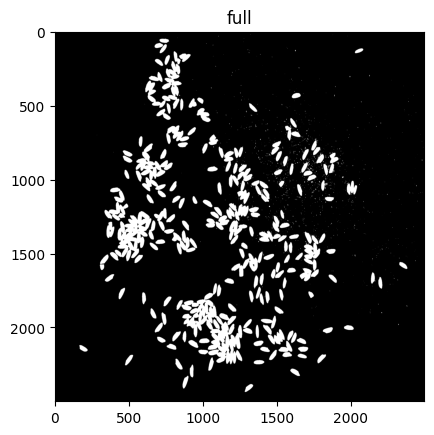

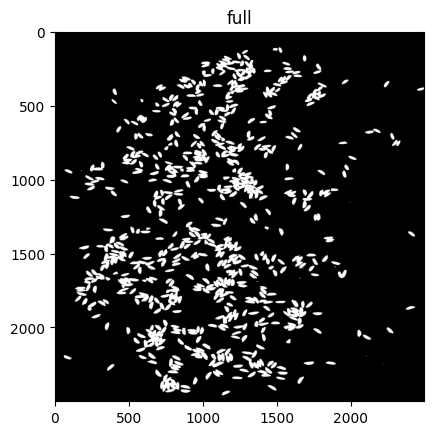

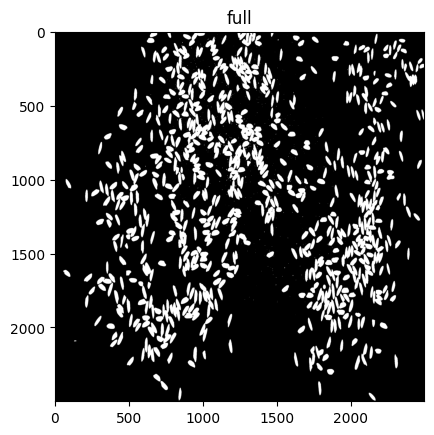

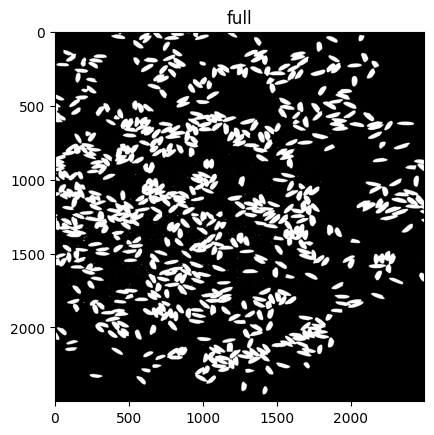

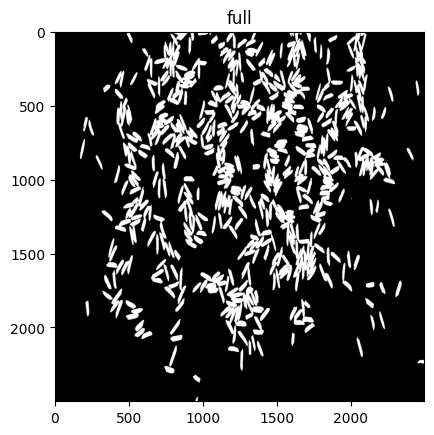

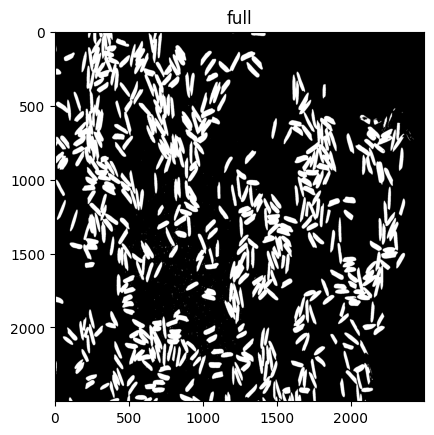

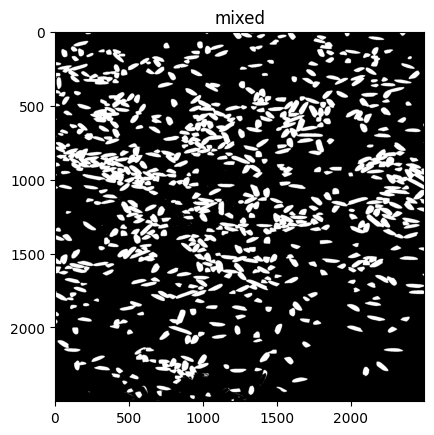

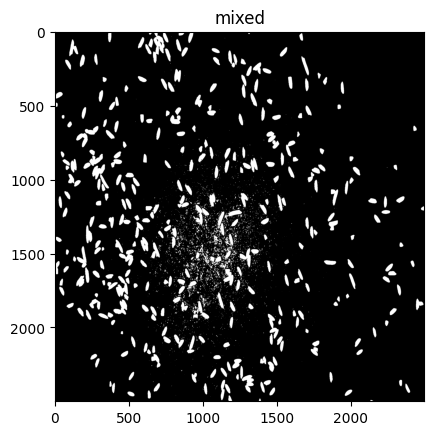

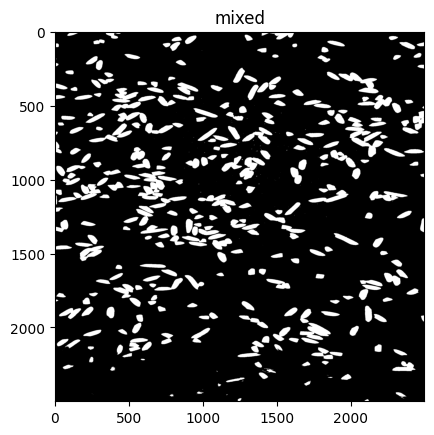

In [7]:
for img_name in img_list:
    img_path = os.path.join(train_path, img_name)
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (2500, 2500))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]
        label = img_name.split("_")[0]
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.show()
    else:
        print(f"{img_path} not found")

Image: broken_grain_1.jpg  - Grain count: 1002


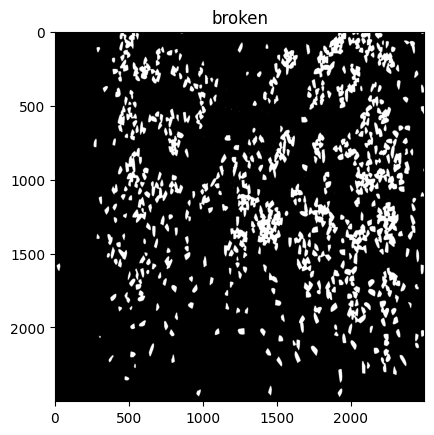

Image: broken_grain_2.jpg  - Grain count: 527


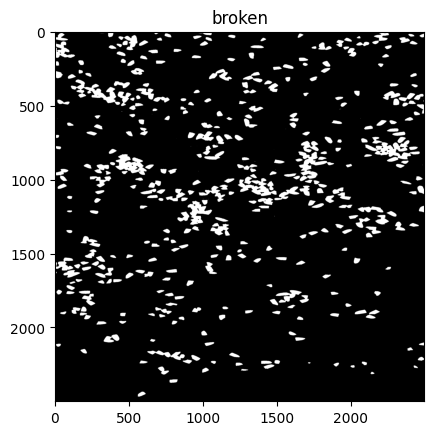

Image: broken_grain_3.jpg  - Grain count: 481


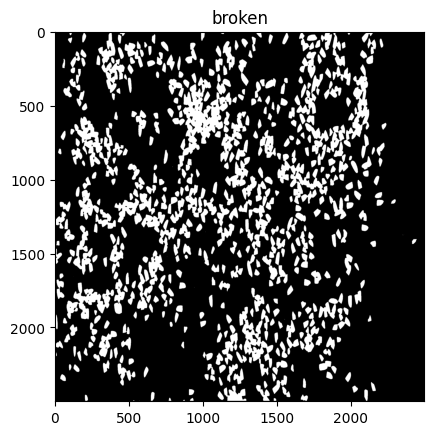

Image: full_grain_1.jpg  - Grain count: 1231


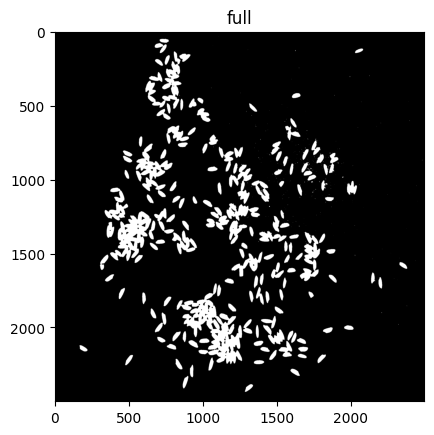

Image: full_grain_2.jpg  - Grain count: 420


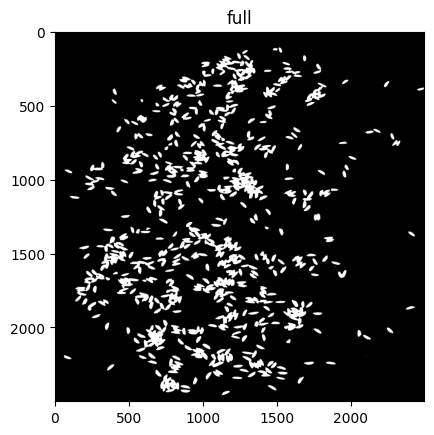

Image: full_grain_3.jpg  - Grain count: 987


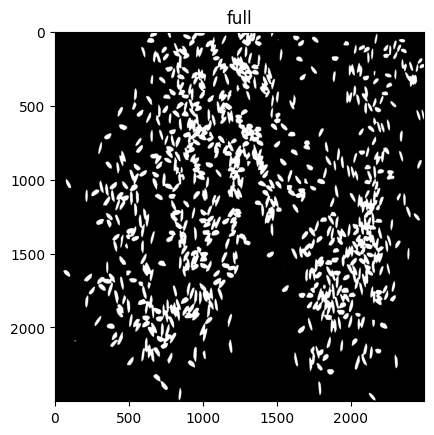

Image: full_grain_4.jpg  - Grain count: 732


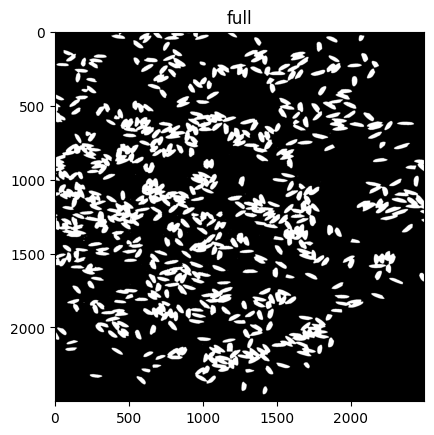

Image: full_grain_5.jpg  - Grain count: 450


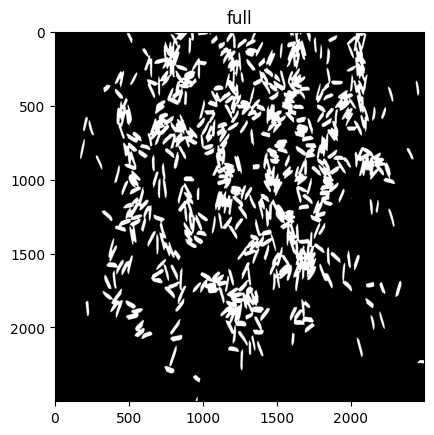

Image: full_grain_6.jpg  - Grain count: 570


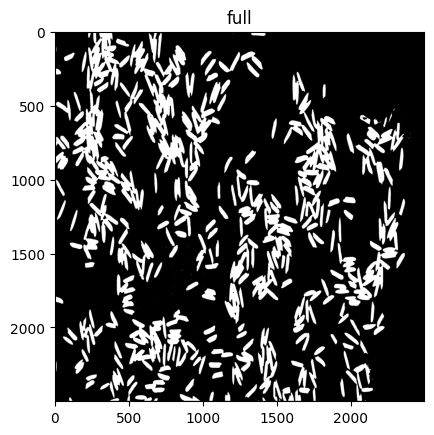

Image: mixed_grains_3.jpg  - Grain count: 493


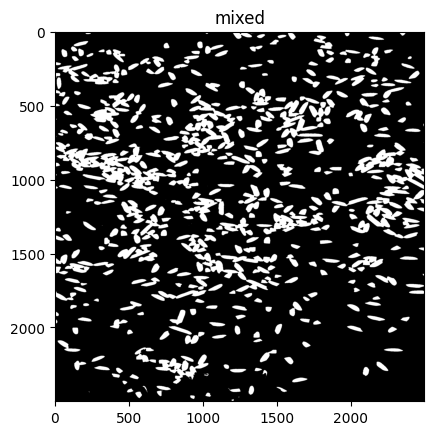

Image: mixed_grain_1.jpg  - Grain count: 2949


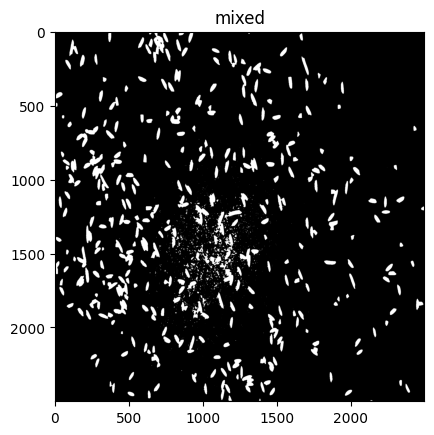

Image: mixed_grain_2.jpg  - Grain count: 443


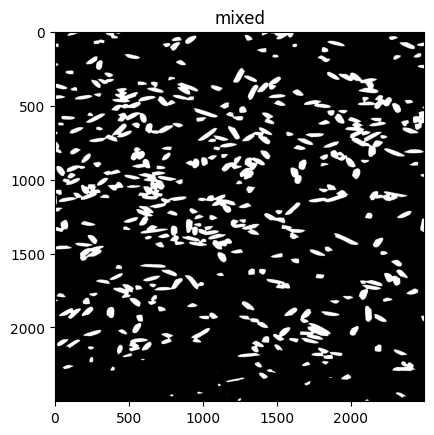

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
operation = cv2.MORPH_CLOSE

grain_counts = []

for img_name in img_list:
    img = cv2.imread(os.path.join(train_path, img_name))
    img = cv2.resize(img, (2500, 2500))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]
    img = cv2.morphologyEx(img, operation, kernel)
    contours, _ = cv2.findContours(img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img = cv2.drawContours(img, contours, -1, (0,255,0), 1)
    label = img_name.split("_")[0]
    grain_counts.append(len(contours))
    print("Image:", img_name, " - Grain count:", len(contours))
    plt.imshow(img,cmap='gray')
    plt.title(label)
    plt.show()

Image: image_1.jpg  - Grain count: 1147  - Broken grain count: 832


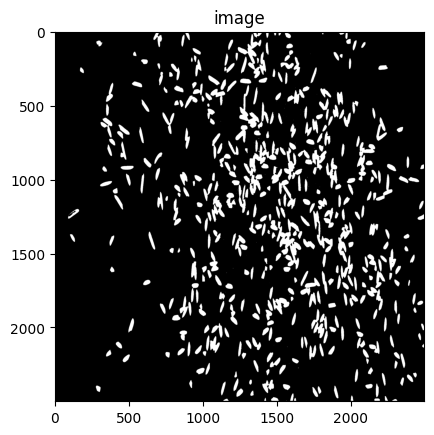

Image: image_2.jpg  - Grain count: 611  - Broken grain count: 337


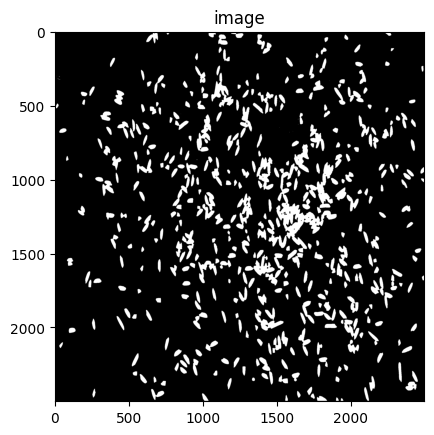

Image: image_3.jpg  - Grain count: 888  - Broken grain count: 590


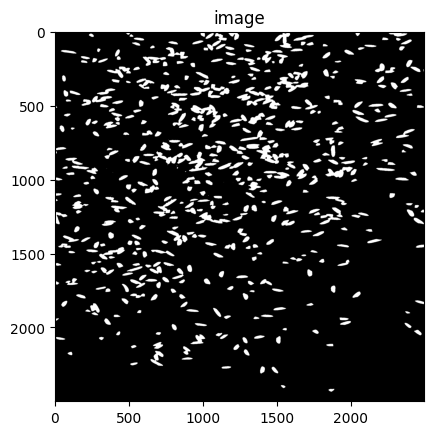

Image: image_4.jpg  - Grain count: 1172  - Broken grain count: 904


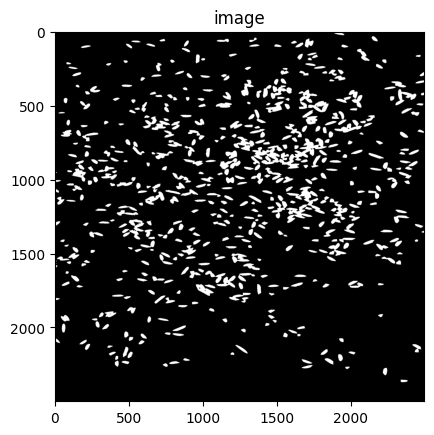

Image: image_5.jpg  - Grain count: 493  - Broken grain count: 174


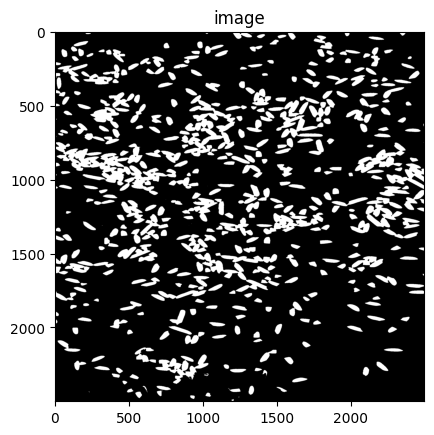

In [9]:
test_img_list = os.listdir(test_path)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
operation = cv2.MORPH_CLOSE

grain_counts = []
broken_grain_count = []

for img_name in test_img_list:
    img = cv2.imread(os.path.join(test_path, img_name))
    img = cv2.resize(img, (2500, 2500))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]
    img = cv2.morphologyEx(img, operation, kernel)
    contours, _ = cv2.findContours(img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img = cv2.drawContours(img, contours, -1, (0,255,0), 1)
    label = img_name.split("_")[0]
    grain_counts.append(len(contours))
    count = []
    for x in contours:
        area = cv2.contourArea(x)
        if area < 800:
            count.append(x)
    broken_grain_count.append(len(count))
    print("Image:", img_name, " - Grain count:", len(contours), " - Broken grain count:", len(count))
    plt.imshow(img,cmap='gray')
    plt.title(label)
    plt.show()

In [10]:
results = {"filename": test_img_list, "total_rice_grain": grain_counts,"total_broken_rice_grain":broken_grain_count}

In [11]:
df = pd.DataFrame(results)

In [12]:
df.head()

filename  total_rice_grain  total_broken_rice_grain
0  image_1.jpg              1147                      832
1  image_2.jpg               611                      337
2  image_3.jpg               888                      590
3  image_4.jpg              1172                      904
4  image_5.jpg               493                      174

In [13]:
submission = pd.DataFrame(results)

In [14]:
submission.head()

filename  total_rice_grain  total_broken_rice_grain
0  image_1.jpg              1147                      832
1  image_2.jpg               611                      337
2  image_3.jpg               888                      590
3  image_4.jpg              1172                      904
4  image_5.jpg               493                      174

In [15]:
submission.to_csv("submission.csv", index=False)

# references:
1.https://github.com/mramanindia/Counting_rice_grain/blob/main/Rice%20grain%20counting.ipynb
2.https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/